# Data Analysis on Actors/Actresses/Directors

The goal of this data analysis is to locate directors, actors, and actresses who were infilms that were at least 50 million nudget and a stable ROI. This dataset is from 2010-2020. 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [74]:
master_df = pd.read_pickle('movie_master_dataset.pkl')
master_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI,person_name,movie_role,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Johnny Depp,actor,True,...,False,False,False,False,False,False,False,False,False,False
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Geoffrey Rush,actor,True,...,False,False,False,False,False,False,False,False,False,False
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Penélope Cruz,actress,True,...,False,False,False,False,False,False,False,False,False,False
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Stuart Beattie,writer,True,...,False,False,False,False,False,False,False,False,False,False
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Ted Elliott,writer,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-1.000000,Tim Mutungi,actor,False,...,False,False,False,False,False,False,False,False,False,False
15056,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-1.000000,Wangechi Ngugi,producer,False,...,False,False,False,False,False,False,False,False,False,False
15057,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-1.000000,Sunny Dolat,production_designer,False,...,False,False,False,False,False,False,False,False,False,False
15058,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-1.000000,Njoki Ngumi,writer,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
##data is from 2010-2020
master_df['release_date'].dt.year.value_counts() 

2015    1912
2014    1876
2011    1776
2010    1746
2013    1706
2012    1624
2016    1610
2017    1201
2018    1189
2019     410
2020      10
Name: release_date, dtype: int64

In [76]:
#Can use for the quartiles of ROI or Gross
master_df.describe()

,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI
count,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,15060.000000
mean,4.487625e+07,5.626658e+07,1.410753e+08,9.619909e+07,2.667411
std,5.605332e+07,8.478568e+07,2.341220e+08,1.932956e+08,12.026254
min,1.500000e+04,0.000000e+00,0.000000e+00,-2.002376e+08,-1.000000
25%,8.000000e+06,3.088571e+06,7.879319e+06,-8.989470e+05,-0.298438
50%,2.400000e+07,2.756956e+07,5.169536e+07,2.265186e+07,1.094614
75%,5.750000e+07,6.736324e+07,1.587508e+08,1.057634e+08,2.975409
max,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,415.564740


In [77]:
master_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI,person_name,movie_role,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Johnny Depp,actor,True,...,False,False,False,False,False,False,False,False,False,False
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Geoffrey Rush,actor,True,...,False,False,False,False,False,False,False,False,False,False
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Penélope Cruz,actress,True,...,False,False,False,False,False,False,False,False,False,False
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Stuart Beattie,writer,True,...,False,False,False,False,False,False,False,False,False,False
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,Ted Elliott,writer,True,...,False,False,False,False,False,False,False,False,False,False


In [78]:
master_df['movie_role'].value_counts().head() ##types of roles. There are almost twice as many actors as actresses

actor       3793
producer    2954
writer      2778
actress     2199
director    1623
Name: movie_role, dtype: int64

<b>Establish new tables that use an ROI range and production budget over 50 million so its dealing with "good" data</b>

In [80]:
##dataframe of actors only who were in movies with at least 50 mil budget
actors = master_df.loc[(master_df['movie_role'] == "actor") & (master_df['production_budget'] > 50000000)] 
##dataframe of actors/actress with ROI over 50% and below 300%
actors_ROI = actors.loc[(actors['ROI'] > .5) & (actors['ROI'] < 3)] 

In [81]:
actresses = master_df.loc[(master_df['movie_role'] == "actress") & (master_df['production_budget'] > 50000000)]
actresses_ROI = actresses.loc[(actresses['ROI'] > .5) & (actresses['ROI'] < 3)] 

Emily Blunt             5
Jennifer Lawrence       5
Anne Hathaway           3
Rosario Dawson          3
Angelina Jolie          3
Anna Faris              3
Emily Mortimer          3
Eva Green               3
Cate Blanchett          3
Anna Kendrick           3
Cameron Diaz            3
Charlize Theron         3
Emma Stone              3
Zoe Saldana             2
Helena Bonham Carter    2
Margot Robbie           2
Alexandra Daddario      2
Isla Fisher             2
Megan Fox               2
Alicia Vikander         2
Name: person_name, dtype: int64

In [82]:
directors = master_df[(master_df['movie_role'] == "director") & (master_df['production_budget'] > 50000000)] ##dataframe of directors only
directors_ROI = directors[(directors['ROI'] > .5) & (directors['ROI'] < 3)] ##dataframe of directors ROI over 50% and below 300%

In [85]:
#hard coded, list of column names for the genres
master_df_genre_col_names = ['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

The following two cells get the top 5 genres for actors and directors with good ROI

In [86]:
list(actors_ROI[master_df_genre_col_names].sum().sort_values(ascending=False).head().index) ##top 5 genres for actors with ROI between 50% and 300%

['Adventure', 'Action', 'Comedy', 'Animation', 'Drama']

In [87]:
list(directors_ROI[master_df_genre_col_names].sum().sort_values(ascending=False).head().index) #same as above but for directors. top 5 genres for directors with ROI between 50% and 300%

['Adventure', 'Action', 'Comedy', 'Animation', 'Drama']

<b>DIRECTORS - The following cell queries the good ROI dataframe and budget over 50 million to collect only the information we want</b>

In [106]:
q = ("""
SELECT person_name, movie, ROI, Adventure, Action, Comedy, Animation, Drama
FROM directors_ROI
ORDER BY ROI
""")

director_ROI_clean = pysqldf(q)
director_ROI_clean

##option to add a WHERE clause to find values using genre

,person_name,movie,ROI,Adventure,Action,Comedy,Animation,Drama
0,Rupert Sanders,Ghost in the Shell,0.526461,0,1,0,0,1
1,Ridley Scott,Robin Hood,0.535519,1,1,0,0,1
2,Paul W.S. Anderson,The Three Musketeers,0.554199,1,1,0,0,0
3,Tim Burton,Dark Shadows,0.588018,0,0,1,0,0
4,Paul Feig,Ghostbusters,0.590338,0,1,1,0,0
...,...,...,...,...,...,...,...,...
221,Alejandro G. Iñárritu,The Revenant,2.947691,1,1,0,0,0
222,Chris Williams,Big Hero 6,2.952290,1,1,0,1,0
223,Don Hall,Big Hero 6,2.952290,1,1,0,1,0
224,Clint Eastwood,Sully,2.975409,0,0,0,0,1


In [89]:
director_comedy = director_ROI_clean[director_ROI_clean['Comedy'] == 1] ##for comedy for example
director_comedy['person_name'].value_counts()

Dennis Dugan       3
Shawn Levy         3
Rob Letterman      2
Carlos Saldanha    2
Rob Marshall       2
                  ..
Paul Weitz         1
John Lasseter      1
Larry Charles      1
Guy Ritchie        1
Paul Feig          1
Name: person_name, Length: 79, dtype: int64

In [90]:
director_ROI_clean['person_name'].value_counts().head(20) 

Shawn Levy            4
Ridley Scott          4
Antoine Fuqua         4
Zack Snyder           3
Dennis Dugan          3
Rob Marshall          3
Steven Spielberg      3
Rupert Sanders        2
M. Night Shyamalan    2
Bryan Singer          2
Marc Webb             2
Martin Scorsese       2
Baltasar Kormákur     2
Chris Columbus        2
Peter Jackson         2
David Yates           2
Tarsem Singh          2
Rob Letterman         2
Jonathan Liebesman    2
Marc Forster          2
Name: person_name, dtype: int64

<AxesSubplot:>

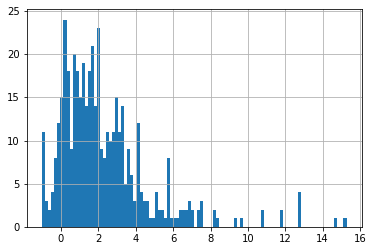

In [91]:
directors['ROI'].hist(bins=100)

<AxesSubplot:>

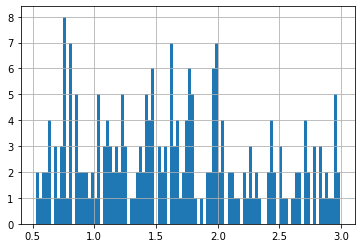

In [92]:
directors_ROI['ROI'].hist(bins=100)

In [93]:
##i def have suggestions on directors who relate to the top genres, and good ROI, 
#and have produced several movies in those categories. 
#just having a hard time deciding what a "good ROI" range is to present...
#and if i can draw that conclusion from a graph. Currently playing with histogram. 
#I did ROI .5 - 3 (50%-300%). Top graph shows only directors and all ROI values. 
#Bottom graph shows all directors with ROI .5-3. 

<b>ACTORS - The following cells query the good ROI for actors in the top 5 genres</b>

In [94]:
q2 = ("""
SELECT person_name, movie, ROI, Adventure, Action, Comedy, Animation, Drama
FROM actors_ROI
ORDER BY ROI
""")

actors_ROI_clean = pysqldf(q2)

In [95]:
actors_ROI_clean

,person_name,movie,ROI,Adventure,Action,Comedy,Animation,Drama
0,Takeshi Kitano,Ghost in the Shell,0.526461,0,1,0,0,1
1,Pilou Asbæk,Ghost in the Shell,0.526461,0,1,0,0,1
2,Russell Crowe,Robin Hood,0.535519,1,1,0,0,1
3,Max von Sydow,Robin Hood,0.535519,1,1,0,0,1
4,Matthew Macfadyen,Robin Hood,0.535519,1,1,0,0,1
...,...,...,...,...,...,...,...,...
574,Tom Hanks,Sully,2.975409,0,0,0,0,1
575,Aaron Eckhart,Sully,2.975409,0,0,0,0,1
576,Michael Douglas,Ant-Man,2.991219,1,1,1,0,0
577,Paul Rudd,Ant-Man,2.991219,1,1,1,0,0


In [101]:
actors_ROI_clean['person_name'].value_counts().head(20)

Johnny Depp           8
Denzel Washington     7
Chris Pine            7
Owen Wilson           6
Tom Cruise            6
Mark Wahlberg         5
Tom Hardy             5
Joel Edgerton         5
Dwayne Johnson        5
Matt Damon            5
Ben Kingsley          4
Kevin James           4
Dominic Cooper        4
Anthony Hopkins       4
Michael Fassbender    4
Adam Sandler          4
Leonardo DiCaprio     4
Ben Stiller           4
James McAvoy          4
Samuel L. Jackson     4
Name: person_name, dtype: int64

<b>ACTRESSES -  The following cells query the good ROI for actresses in the top 5 genres</b>

In [99]:
q3 = ("""
SELECT person_name, movie, ROI, Adventure, Action, Comedy, Animation, Drama
FROM actresses_ROI
ORDER BY ROI
""")

actresses_ROI_clean = pysqldf(q3)

In [100]:
actresses_ROI_clean

,person_name,movie,ROI,Adventure,Action,Comedy,Animation,Drama
0,Juliette Binoche,Ghost in the Shell,0.526461,0,1,0,0,1
1,Scarlett Johansson,Ghost in the Shell,0.526461,0,1,0,0,1
2,Cate Blanchett,Robin Hood,0.535519,1,1,0,0,1
3,Milla Jovovich,The Three Musketeers,0.554199,1,1,0,0,0
4,Michelle Pfeiffer,Dark Shadows,0.588018,0,0,1,0,0
...,...,...,...,...,...,...,...,...
235,Anne Hathaway,The Dark Knight Rises,2.943415,0,1,0,0,0
236,Jamie Chung,Big Hero 6,2.952290,1,1,0,1,0
237,Laura Linney,Sully,2.975409,0,0,0,0,1
238,Valerie Mahaffey,Sully,2.975409,0,0,0,0,1


In [102]:
actresses_ROI_clean['person_name'].value_counts().head(20)

Jennifer Lawrence    5
Emily Blunt          5
Cameron Diaz         3
Charlize Theron      3
Angelina Jolie       3
Anne Hathaway        3
Eva Green            3
Cate Blanchett       3
Anna Faris           3
Anna Kendrick        3
Emily Mortimer       3
Emma Stone           3
Rosario Dawson       3
Angela Bassett       2
Laura Linney         2
Gwyneth Paltrow      2
Rose Byrne           2
Kate McKinnon        2
Hayley Atwell        2
Margot Robbie        2
Name: person_name, dtype: int64